# Dataset Preparation

In [1]:
import os
import numpy
import pandas
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
!ls

drive  sample_data


In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True) 

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd drive/MyDrive/CIS612-BigData-Project-Sentiment-Analysis/Sentiment Analysis

/content/drive/MyDrive/CIS612-BigData-Project-Sentiment-Analysis/Sentiment Analysis


In [6]:
!ls

 input	 output   Proposal   Report  'Sentiment Analysis Model.ipynb'


In [7]:
filepath = 'input/tweets-collection.zip'
destination = 'input'

In [8]:
files = [
    'input/tweets-collection/testing-data.csv',
    'input/tweets-collection/training-data.csv'
]

In [9]:
for file in files:
  if os.path.exists(file):
    os.remove(file) 

In [10]:
!unzip {filepath} -d {destination}

Archive:  input/tweets-collection.zip
  inflating: input/tweets-collection/testing-data.csv  
  inflating: input/tweets-collection/training-data.csv  


In [11]:
dfs = []

for file in files:
  df = pandas.read_csv(file, encoding='ISO-8859-1', header=None)
  dfs.append(df)

In [12]:
df = pandas.concat(dfs)

In [13]:
df

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Data Preprocessing & Feature Engineering

In [14]:
columns = df.columns 

In [15]:
columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [16]:
df.drop([1,2,3,4], axis=1, inplace=True)

In [17]:
df

,0,5
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [18]:
df.columns = ['sentiment', 'tweet']

In [19]:
df

,sentiment,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [20]:
y_labels = df['sentiment']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df['tweet'], y_labels, test_size = 0.33, random_state = 0)

In [22]:
display(f"X Train Shape: {X_train.shape}")
display(f'X Test Shape: {X_test.shape}')
display(f'Y Train Shape: {Y_train.shape}')
display(f'Y Test Shape: {Y_test.shape}')

'X Train Shape: (1072333,)'

'X Test Shape: (528165,)'

'Y Train Shape: (1072333,)'

'Y Test Shape: (528165,)'

#### Tokenization

In [23]:
max_words = 10000
tokenizer_instance = Tokenizer(max_words)

tokenizer_instance.fit_on_texts(X_train)

x_training_text_sequences = tokenizer_instance.texts_to_sequences(X_train)
x_testing_text_sequences = tokenizer_instance.texts_to_sequences(X_test) 

In [24]:
wordTovector = tokenizer_instance.word_index
vector_result = len(wordTovector) 

In [25]:
WordCountDf = pandas.DataFrame.from_dict(wordTovector, orient='index', columns=['WordCount'])
WordCountDf.index.name = 'Term'

WordCountDf.to_csv(f"output/Word-Index-Dictionary-File.csv")

In [26]:
WordCountDf

,WordCount
Term,
i,1
to,2
the,3
a,4
my,5
...,...
'brandon,527476
walsh',527477
fall'n,527478


In [27]:
display(f'dataset has {vector_result} number of independent tokens')

'dataset has 527480 number of independent tokens'

#### Padding Sequences

In [28]:
X_train = pad_sequences(x_training_text_sequences)
X_test = pad_sequences(x_testing_text_sequences, maxlen=X_train.shape[1]) 

In [29]:
print(f"\n{X_train.shape}")
print(f"\n{X_test.shape}") 


(1072333, 116)

(528165, 116)


# Modelling

In [30]:
from tensorflow import keras 
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Embedding

In [31]:
threshold = 20

input_shape = Input((X_train.shape[1],))
input_layer = Embedding((vector_result) + 1, threshold)(input_shape)
input_layer = Conv1D(32,3,activation='relu')(input_layer)
input_layer = MaxPooling1D(3)(input_layer)
input_layer = Conv1D(64,3,activation='relu')(input_layer)
input_layer = MaxPooling1D(3)(input_layer)
input_layer = Conv1D(128,3,activation='relu')(input_layer)
input_layer = GlobalMaxPooling1D()(input_layer)
input_layer = Dense(5,activation='softmax')(input_layer)

In [32]:
model = Model(input_shape, input_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 embedding (Embedding)       (None, 116, 20)           10549620  
                                                                 
 conv1d (Conv1D)             (None, 114, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 38, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 64)           0         
 1D)                                                         

# Model Training

In [33]:
loss = 'sparse_categorical_crossentropy'
metric = 'accuracy'
optimizer = 'SGD'

In [34]:
model.compile(loss = loss, optimizer = optimizer, metrics=[metric])

In [35]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 100)

Epoch 1/10
10724/10724 [==============================] - 378s 35ms/step - loss: 0.6996 - accuracy: 0.5231 - val_loss: 0.6918 - val_accuracy: 0.5291
Epoch 2/10
10724/10724 [==============================] - 360s 34ms/step - loss: 0.6654 - accuracy: 0.5890 - val_loss: 0.5961 - val_accuracy: 0.6847
Epoch 3/10
10724/10724 [==============================] - 363s 34ms/step - loss: 0.5067 - accuracy: 0.7544 - val_loss: 0.4688 - val_accuracy: 0.7784
Epoch 4/10
10724/10724 [==============================] - 340s 32ms/step - loss: 0.4553 - accuracy: 0.7876 - val_loss: 0.4675 - val_accuracy: 0.7763
Epoch 5/10
10724/10724 [==============================] - 335s 31ms/step - loss: 0.4380 - accuracy: 0.7976 - val_loss: 0.4353 - val_accuracy: 0.7988
Epoch 6/10
10724/10724 [==============================] - 346s 32ms/step - loss: 0.4278 - accuracy: 0.8033 - val_loss: 0.4409 - val_accuracy: 0.7948
Epoch 7/10
10724/10724 [==============================] - 344s 32ms/step - loss: 0.4208 - accuracy: 0.8073

# Prediction

In [36]:
Y_Train_Prediction = model.predict(X_train) 

33511/33511 [==============================] - 163s 5ms/step


In [37]:
Y_Train_Prediction

array([[9.25704002e-01, 7.79476250e-05, 1.70430663e-04, 7.07483050e-05,
        7.39769638e-02],
       [9.44872975e-01, 6.86153435e-05, 1.43188561e-04, 5.98326405e-05,
        5.48553951e-02],
       [9.67142820e-01, 3.60696577e-05, 7.72200801e-05, 3.04590340e-05,
        3.27134393e-02],
       ...,
       [8.97376597e-01, 8.33813829e-05, 1.85817888e-04, 7.38223025e-05,
        1.02280505e-01],
       [8.96644965e-02, 5.75275189e-05, 1.58227485e-04, 6.31636649e-05,
        9.10056651e-01],
       [7.49470949e-01, 2.06080713e-05, 5.82445718e-05, 1.68493261e-05,
        2.50433236e-01]], dtype=float32)

In [38]:
Y_Train_Prediction = numpy.argmax(Y_Train_Prediction, axis=1)

In [39]:
Y_Train_Prediction

array([0, 0, 0, ..., 0, 4, 0])

In [58]:
Y_Test_Split_Prediction = model.predict(X_test) 

16506/16506 [==============================] - 79s 5ms/step


In [59]:
Y_Test_Split_Prediction

array([[9.83180344e-01, 1.26600371e-05, 2.91090491e-05, 1.00962634e-05,
        1.67678352e-02],
       [2.60493040e-01, 2.00284830e-05, 6.58588397e-05, 1.63932018e-05,
        7.39404619e-01],
       [5.55008417e-03, 3.41778650e-06, 1.20597633e-05, 3.66556446e-06,
        9.94430780e-01],
       ...,
       [1.01336345e-01, 1.55422851e-04, 3.91157635e-04, 1.75639449e-04,
        8.97941411e-01],
       [9.68695343e-01, 6.60740488e-06, 1.76086414e-05, 5.22776008e-06,
        3.12753841e-02],
       [9.37702835e-01, 2.74013637e-05, 6.42262385e-05, 2.02798055e-05,
        6.21852316e-02]], dtype=float32)

In [60]:
Y_Test_Prediction = numpy.argmax(Y_Test_Split_Prediction, axis=1)

In [61]:
Y_Test_Prediction

array([0, 4, 4, ..., 4, 0, 0])

# Performance Metrics Evaluation

#### Confusion matrix evaluation

Text(0.5, 1.0, 'Confusion Matrix In action')

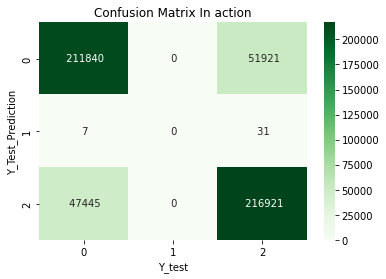

In [63]:
matrix = confusion_matrix(Y_test, Y_Test_Prediction)
axis = sns.heatmap(
    matrix, 
    annot = True,
    cmap = 'Greens',
    fmt = ' '
)
axis.set_xlabel('Y_test')
axis.set_ylabel('Y_Test_Prediction')

axis.set_title('Confusion Matrix In action')

In [64]:
figure = axis.get_figure()
figure.savefig(f"output/ConfusionMatrix.png")

### Metrics Evaluation

In [65]:
print(classification_report(Y_test, Y_Test_Prediction))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.80      0.81    263761
           2       0.00      0.00      0.00        38
           4       0.81      0.82      0.81    264366

    accuracy                           0.81    528165
   macro avg       0.54      0.54      0.54    528165
weighted avg       0.81      0.81      0.81    528165



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
